In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data
df = pd.read_csv('./Datasets/reddit_wsb_daily.csv')

# Selecting relevant data
# Version 1: title and body
# df = df[["date", "count_title", "count_body",
#         "count_gme_title", "count_gme_body",
#         "count_amc_title", "count_amc_body",
#         "count_bb_title", "count_bb_body",
#         "count_clov_title", "count_clov_body"]]

# Version 2: body only
df = df[["date", "count_body",
        "count_gme_body",
        "count_amc_body",
        "count_bb_body",
        "count_clov_body"]]

# Cleaning data
df["date"] = pd.to_datetime(df["date"])

# Aggregating data
new_df = pd.DataFrame()

# Version 1: title + body
# new_df["date"] = df["date"]
# new_df["total"] = df["count_title"] + df["count_body"]
# new_df["gme"] = df["count_gme_title"] + df["count_gme_body"]
# new_df["amc"] = df["count_amc_title"] + df["count_amc_body"]
# new_df["bb"] = df["count_bb_title"] + df["count_bb_body"]
# new_df["clov"] = df["count_clov_title"] + df["count_clov_body"]

# Version 2: body only
new_df["date"] = df["date"]
new_df["total"] = df["count_body"]
new_df["GME"] = df["count_gme_body"]
new_df["AMC"] = df["count_amc_body"]
new_df["BB"] = df["count_bb_body"]
new_df["CLOV"] = df["count_clov_body"]
new_df["Others"] = new_df["total"] - new_df["GME"] - new_df["AMC"] - new_df["BB"] - new_df["CLOV"]

# Cleaning aggregated data
# Change NA to 0
new_df["GME"] = new_df["GME"].fillna(0)
new_df["AMC"] = new_df["AMC"].fillna(0)
new_df["BB"] = new_df["BB"].fillna(0)
new_df["CLOV"] = new_df["CLOV"].fillna(0)
new_df["Others"] = new_df["Others"].fillna(0)

# Changing negative to 0
new_df["Others"] = new_df["Others"].clip(0)

new_df

,date,total,GME,AMC,BB,CLOV,Others
0,2021-01-28,684,255.0,114.0,63.0,0.0,0.0
1,2021-01-29,9034,2507.0,1011.0,623.0,0.0,0.0
2,2021-01-30,648,363.0,87.0,49.0,0.0,0.0
3,2021-01-31,426,279.0,53.0,37.0,0.0,0.0
4,2021-02-01,319,215.0,48.0,34.0,0.0,0.0
...,...,...,...,...,...,...,...
171,2021-08-12,35,1.0,0.0,1.0,1.0,0.0
172,2021-08-13,31,2.0,1.0,1.0,2.0,25.0
173,2021-08-14,16,1.0,1.0,0.0,2.0,0.0
174,2021-08-15,17,0.0,1.0,0.0,0.0,0.0


In [3]:
# 19 Feb - 10 Mar
start_date = np.datetime64("2021-02-19")
end_date = np.datetime64("2021-03-10")
mask = (new_df["date"] >= start_date) & (new_df["date"] <= end_date)
df1 = new_df.loc[mask].drop(["date", "total"], axis=1)
df1 = df1.sum()

# 1 Apr - 30 Apr
start_date = np.datetime64("2021-04-01")
end_date = np.datetime64("2021-04-30")
mask = (new_df["date"] >= start_date) & (new_df["date"] <= end_date)
df2 = new_df.loc[mask].drop(["date", "total"], axis=1)
df2 = df2.sum()

# 1 May - 28 May
start_date = np.datetime64("2021-05-01")
end_date = np.datetime64("2021-05-28")
mask = (new_df["date"] >= start_date) & (new_df["date"] <= end_date)
df3 = new_df.loc[mask].drop(["date", "total"], axis=1)
df3 = df3.sum()

frames = [df1, df2, df3]
results = pd.concat(frames, axis=1).transpose().rename(index={0: "19 Feb - 10 Mar",
                                                              1: "1 Apr - 30 Apr",
                                                              2: "1 May - 28 May"})

results

,GME,AMC,BB,CLOV,Others
19 Feb - 10 Mar,731.0,157.0,73.0,3.0,156.0
1 Apr - 30 Apr,119.0,30.0,18.0,20.0,64.0
1 May - 28 May,90.0,50.0,25.0,21.0,177.0


<AxesSubplot:title={'center':'Breakdown of Threads'}>

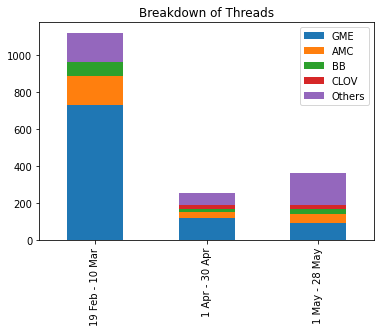

In [4]:
labels = ["19 Feb - 10 Mar", "1 Apr - 30 Apr", "1 May - 28 May"]
results.plot(kind="bar", stacked=True, title="Breakdown of Threads")

In [5]:
# 19 Feb - 10 Mar
start_date = np.datetime64("2021-02-19")
end_date = np.datetime64("2021-03-10")
mask = (new_df["date"] >= start_date) & (new_df["date"] <= end_date)
df1 = new_df.loc[mask].drop(["date", "total"], axis=1)
df1 = df1.sum()
df1["total"] = df1.sum()
df1 = df1/df1["total"] * 100
df1 = df1.drop("total")

# 1 Apr - 30 Apr
start_date = np.datetime64("2021-04-01")
end_date = np.datetime64("2021-04-30")
mask = (new_df["date"] >= start_date) & (new_df["date"] <= end_date)
df2 = new_df.loc[mask].drop(["date", "total"], axis=1)
df2 = df2.sum()
df2["total"] = df2.sum()
df2 = df2/df2["total"] * 100
df2 = df2.drop("total")

# 1 May - 28 May
start_date = np.datetime64("2021-05-01")
end_date = np.datetime64("2021-05-28")
mask = (new_df["date"] >= start_date) & (new_df["date"] <= end_date)
df3 = new_df.loc[mask].drop(["date", "total"], axis=1)
df3 = df3.sum()
df3["total"] = df3.sum()
df3 = df3/df3["total"] * 100
df3 = df3.drop("total")

frames = pd.concat([df1, df2, df3], axis=1)
results = frames.transpose().rename(index={0: "19 Feb - 10 Mar", 
                                                          1: "1 Apr - 30 Apr",
                                                          2: "1 May - 28 May"})

results

,GME,AMC,BB,CLOV,Others
19 Feb - 10 Mar,65.267857,14.017857,6.517857,0.267857,13.928571
1 Apr - 30 Apr,47.410359,11.952191,7.171315,7.968127,25.498008
1 May - 28 May,24.793388,13.774105,6.887052,5.785124,48.760331


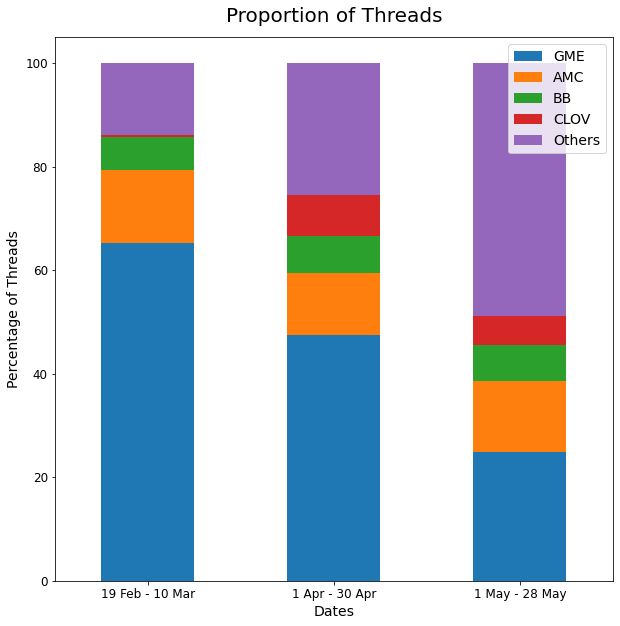

In [6]:
ax = results.plot(kind="bar", stacked=True, figsize=(10,10))
ax.set_ylabel("Percentage of Threads", fontsize=14)
ax.set_xlabel("Dates", fontsize=14)
ax.set_title("Proportion of Threads", fontsize=20, pad=15)
ax.legend(fontsize=14)
plt.xticks(rotation=0) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

In [9]:
# 21 Jun - 25 Jun
start_date = np.datetime64("2021-06-21")
end_date = np.datetime64("2021-06-25")
mask = (new_df["date"] >= start_date) & (new_df["date"] <= end_date)
df1 = new_df.loc[mask].drop(["date", "total"], axis=1)
df1 = df1.sum()
df1["total"] = df1.sum()
df1 = df1/df1["total"] * 100
df1 = df1.drop("total")

# 28 Jun - 01 Jul
start_date = np.datetime64("2021-06-28")
end_date = np.datetime64("2021-07-01")
mask = (new_df["date"] >= start_date) & (new_df["date"] <= end_date)
df2 = new_df.loc[mask].drop(["date", "total"], axis=1)
df2 = df2.sum()
df2["total"] = df2.sum()
df2 = df2/df2["total"] * 100
df2 = df2.drop("total")

# 02 Jul - 06 Jul
start_date = np.datetime64("2021-07-02")
end_date = np.datetime64("2021-07-06")
mask = (new_df["date"] >= start_date) & (new_df["date"] <= end_date)
df3 = new_df.loc[mask].drop(["date", "total"], axis=1)
df3 = df3.sum()
df3["total"] = df3.sum()
df3 = df3/df3["total"] * 100
df3 = df3.drop("total")

frames = pd.concat([df1, df2, df3], axis=1)
results = frames.transpose().rename(index={0: "21 Jun - 25 Jun", 
                                                          1: "28 Jun - 01 Jul",
                                                          2: "02 Jul - 06 Jul"})

results

,GME,AMC,BB,CLOV,Others
21 Jun - 25 Jun,7.692308,7.396450,6.508876,4.733728,73.668639
28 Jun - 01 Jul,7.514451,6.358382,5.780347,4.046243,76.300578
02 Jul - 06 Jul,7.843137,8.496732,5.228758,4.575163,73.856209


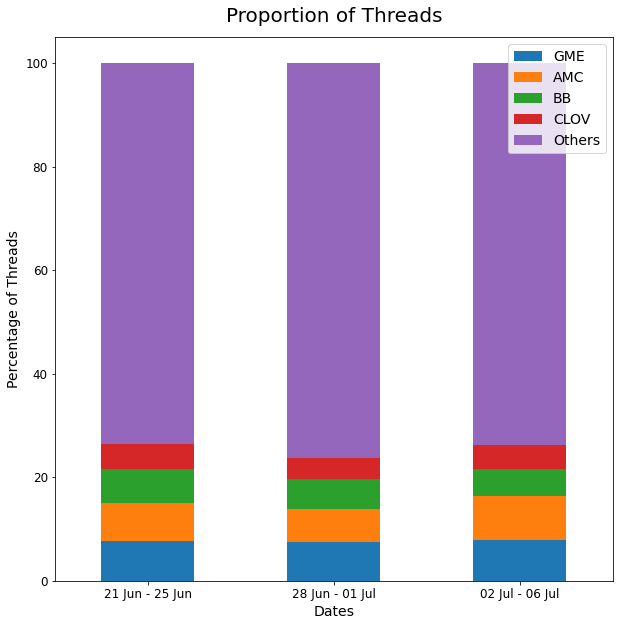

In [10]:
ax = results.plot(kind="bar", stacked=True, figsize=(10,10))
ax.set_ylabel("Percentage of Threads", fontsize=14)
ax.set_xlabel("Dates", fontsize=14)
ax.set_title("Proportion of Threads", fontsize=20, pad=15)
ax.legend(fontsize=14)
plt.xticks(rotation=0) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()